<a href="https://colab.research.google.com/github/Saeif-Saleh/Banking-System/blob/master/Copy_of_Classify_different_antennas_900_245_improved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi
# !pip install --upgrade tensorflow


Tue Mar 24 03:56:55 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0    29W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
import scipy.io
import numpy as np

In [0]:
matlab_data=scipy.io.loadmat('/content/drive/My Drive/thesis_data/R900_245_4.mat')

In [7]:
print(list(matlab_data.keys())[3:])

['R900_T2450_test', 'R900_T2450_train', 'R900_T500_test', 'R900_T500_train', 'R900_T900_test', 'R900_T900_train', 'R900_lime_test', 'R900_lime_train']


In [0]:
train_900=matlab_data['R900_T900_train']
train_2450=matlab_data['R900_T2450_train']
train_500=matlab_data['R900_T500_train']


In [9]:
print(train_900.shape)
print(train_2450.shape)
print(train_500.shape)

(79094137, 2)
(78204989, 2)
(80362202, 2)


In [0]:
# test_900=matlab_data['R900_T900_test']
# test_2450=matlab_data['R900_T2450_test']
# test_500=matlab_data['R900_T500_test']


In [0]:
# print(test_900.shape)
# print(test_2450.shape)
# print(test_500.shape)

In [10]:
print(train_900.shape)
print(train_2450.shape)
print(train_500.shape)

(79094137, 2)
(78204989, 2)
(80362202, 2)


In [0]:
#Slicing data to be divisible by 2**n 
# train_900=train_900[1000000:5194304]
# train_2450=train_2450[1000000:5194304]
# train_500=train_500[1000000:5194304]

train_900=train_900[:41943040]
train_2450=train_2450[:41943040]
train_500=train_500[:41943040]





In [0]:
# test_900=test_900[1000000:9388608]
# test_2450=test_2450[1000000:9388608]
# test_500=test_500[1000000:9388608]



In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [12]:
#Concatenate training and test data
train_x=np.concatenate((train_900,train_2450,train_500),axis=0)
# test_x=np.concatenate((test_900,test_2450,test_500),axis=0)
print(train_x.shape)
# print(test_x.shape)


(125829120, 2)


In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers

Using TensorFlow backend.


In [0]:
n_classes=3
sample_size=128

In [0]:
train_x=train_x.reshape(-1,2,sample_size)
# test_x=test_x.reshape(-1,2,sample_size)

In [0]:
#Creating train_y
train_y=np.zeros(len(train_x))
seprator=int(len(train_y)/n_classes)
train_y[0:seprator]=0
train_y[seprator:2*seprator]=1
train_y[2*seprator:3*seprator]=2
# train_y[3*seprator:]=3
#Creating test_y
# test_y=np.zeros(len(test_x))
# seprator=int(len(test_y)/n_classes)
# test_y[0:seprator]=0
# test_y[seprator:2*seprator]=1
# test_y[2*seprator:3*seprator]=2
# # test_y[3*seprator:]=3


In [0]:
train_y=tf.keras.utils.to_categorical(
    train_y,
    num_classes=n_classes,
    dtype='float32'
)
# test_y=tf.keras.utils.to_categorical(
#     test_y,
#     num_classes=n_classes,
#     dtype='float32'
# )

In [18]:
print(train_x.shape)
print(train_y.shape)

(983040, 2, 128)
(983040, 3)


In [0]:
img_rows=sample_size
img_cols=2
train_x = train_x.reshape(-1, img_rows, img_cols, 1)
# test_x=test_x.reshape(-1,img_rows,img_cols,1)
input_shape = (img_rows, img_cols, 1)

In [20]:
print(input_shape)
print(train_x.shape)
print(train_y.shape)

(128, 2, 1)
(983040, 128, 2, 1)
(983040, 3)


In [0]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size=0.25, shuffle= True)

In [0]:
train_x, valid_x, train_y,valid_y = train_test_split(train_x, train_y, test_size=0.20, shuffle= True)

In [0]:
def create_model():
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Conv2D(64, (1, 2), padding='same', activation='elu'))

  model.add(tf.keras.layers.Dropout(0.25))

  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Conv2D(128, (1, 2), padding='same', activation='elu'))

  model.add(tf.keras.layers.Dropout(0.25))

  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Conv2D(256, (1, 2), padding='same', activation='elu'))

  model.add(tf.keras.layers.Dropout(0.25))
  model.add(tf.keras.layers.BatchNormalization())

  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(256))
  model.add(tf.keras.layers.Activation('elu'))
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.Dense(3))
  model.add(tf.keras.layers.Activation('softmax'))
  return model

In [24]:

conv_model=create_model()
conv_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history=conv_model.fit(train_x, train_y, validation_data=(valid_x,valid_y), epochs=10)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 589824 samples, validate on 147456 samples
Epoch 1/10
589824/589824 [==============================] - 190s 323us/sample - loss: 0.4890 - acc: 0.7630 - val_loss: 0.4413 - val_acc: 0.8785
Epoch 2/10
589824/589824 [==============================] - 183s 310us/sample - loss: 0.2932 - acc: 0.8599 - val_loss: 0.5010 - val_acc: 0.8987
Epoch 3/10
589824/589824 [==============================] - 182s 309us/sample - loss: 0.2333 - acc: 0.8943 - val_loss: 0.9018 - val_acc: 0.9268
Epoch 4/10
589824/589824 [==============================] - 183s 310us/sample - loss: 0.2034 - acc: 0.9099 - val_loss: 0.4452 - val_acc: 0.9028
Epoch 5/10
589824/589824 [==============================] - 183s 310us/sample - loss: 0.1808 - acc: 0.9199 - val_loss: 0.1603 - val_acc: 0.9287
Epoch 6/10
589824/589824 [==============================] - 183s 310us/sample - loss: 0.1631 - acc: 0.9290 - val_loss: 0.2066 - val_acc: 0.9308
Epo

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'bottom right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


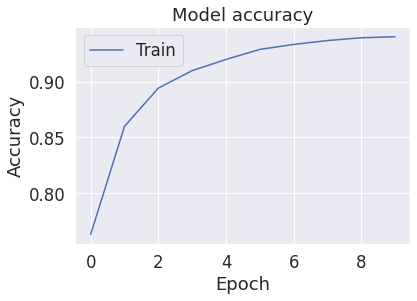

<Figure size 3600x720 with 0 Axes>

In [33]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='bottom right')
plt.figure(figsize=(50,10))
plt.show()

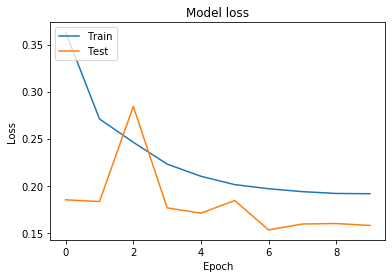

In [0]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
from sklearn.metrics import classification_report, confusion_matrix


In [26]:
conv_model.evaluate(test_x,test_y)

245760/245760 [==============================] - 25s 103us/sample - loss: 0.2493 - acc: 0.9401


[0.24929462231869667, 0.94007164]

In [0]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

In [0]:
y_pred=conv_model.predict(test_x)

In [0]:
matrix = confusion_matrix(test_y.argmax(axis=1), y_pred.argmax(axis=1))


Figure(720x504)


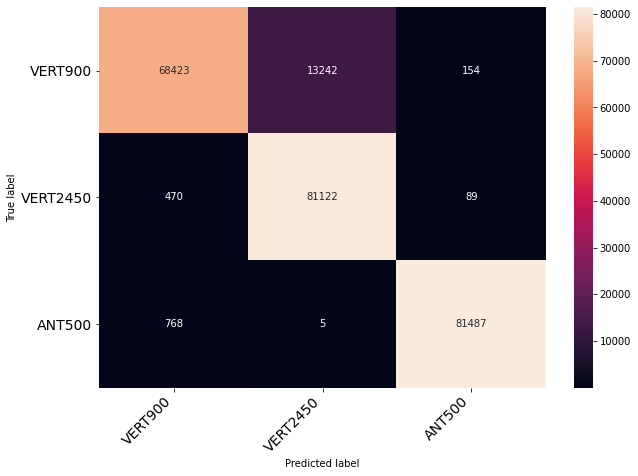

In [30]:
print(print_confusion_matrix(matrix,['VERT900','VERT2450','ANT500']))

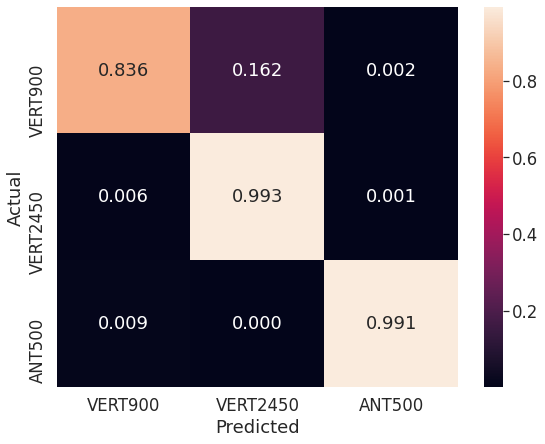

In [31]:
target_names='VERT900','VERT2450','ANT500'
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(test_y.argmax(axis=1),y_pred.argmax(axis=1))
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=(9,7))
sns.heatmap(cmn, annot=True, fmt='.3f', xticklabels=target_names, yticklabels=target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [32]:
from sklearn.metrics import classification_report

print('\033[1m'+classification_report(test_y.argmax(axis=1), y_pred.argmax(axis=1), target_names=target_names))

              precision    recall  f1-score   support

     VERT900       0.98      0.84      0.90     81819
    VERT2450       0.86      0.99      0.92     81681
      ANT500       1.00      0.99      0.99     82260

    accuracy                           0.94    245760
   macro avg       0.95      0.94      0.94    245760
weighted avg       0.95      0.94      0.94    245760

